***Naive Bayes Algorithm***

Accuracy: 0.495


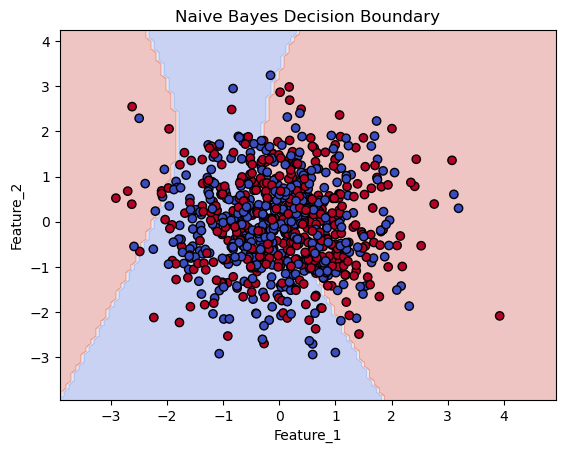

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n_samples = 1000  # Total number of samples
n_features = 5    # Number of features
n_classes = 2     # Number of classes

# Generating  random feature data
X = np.random.randn(n_samples, n_features)

# Generating  random labels (0 or 1)
y = np.random.randint(0, n_classes, n_samples)

# Convert to DataFrame
data = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(n_features)])
data['Label'] = y

# Splitting dataset
X = data.drop(columns=['Label'])
y = data['Label']

# Train-test split function
def train_test_split(X, y, test_size=0.2):
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split = int(len(X) * (1 - test_size))
    train_idx, test_idx = indices[:split], indices[split:]
    return X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Naive Bayes Classifier
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] = X_c.var(axis=0) + 1e-6
            self.priors[c] = len(X_c) / len(X)

    def predict(self, X):
        return np.array([self._predict(x) for x in X.to_numpy()])

    def _predict(self, x):
        posteriors = []
        
        for c in self.classes:
            prior = np.log(self.priors[c])
            class_conditional = np.sum(np.log(self._pdf(c, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)
        
        return self.classes[np.argmax(posteriors)]

    def _pdf(self, class_label, x):
        mean = self.mean[class_label]
        var = self.var[class_label]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

#  Naive Bayes model
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Plotting the decision boundary for the first two features
def plot_decision_boundary(X, y, model):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict on the grid
    Z = model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel(), 
                                         np.zeros((len(xx.ravel()), n_features-2))], 
                                   columns=[f"Feature_{i+1}" for i in range(n_features)]))
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.xlabel("Feature_1")
    plt.ylabel("Feature_2")
    plt.title("Naive Bayes Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundary(X_train[['Feature_1', 'Feature_2']], y_train, nb)
